In [7]:
import tensorflow.keras as keras
from tensorflow.keras import layers


inputs = keras.Input(shape=(32, 32, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)

model = keras.Model(inputs, outputs, name="toy_resnet")
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 30, 30, 32)   896         img[0][0]                        
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 28, 28, 64)   18496       conv2d_7[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 9, 9, 64)     0           conv2d_8[0][0]                   
__________________________________________________________________________________________________
conv2d_9 (

In [2]:
keras.utils.plot_model(model, "mini_resnet.png", show_shapes=True)

In [1]:
import tensorflow.keras as keras
from tensorflow.keras import layers


inputs = keras.Input(shape=(32, 32, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
# x = layers.Softmax()(x)
outputs = layers.Dense(10, activation="softmax")(x)

model = keras.Model(inputs, outputs, name="toy_resnet")
model.summary()

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss="categorical_crossentropy",
    metrics=["acc"],
)
# We restrict the data to the first 1000 samples so as to limit execution time
# on Colab. Try to train on the entire dataset until convergence!
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=0.2)

/home/n10853499/.conda/envs/tensorflow-gpu/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/n10853499/.conda/envs/tensorflow-gpu/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/n10853499/.conda/envs/tensorflow-gpu/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/n10853499/.conda

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 30, 30, 32)   896         img[0][0]                        
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 64)   18496       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 9, 9, 64)     0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (

In [12]:
inputs = keras.Input(shape=(784,))
img_inputs = keras.Input(shape=(32, 32, 3))
dense = layers.Dense(64, activation="relu")
x = dense(inputs)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10)(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
model.summary()
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_18 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_19 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


ImportError: Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

In [11]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="RMSprop",
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=0.2)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 36us/step - loss: 2.3264 - acc: 0.2217 - val_loss: 2.2947 - val_acc: 0.2065
Epoch 2/10
48000/48000 [==============================] - 1s 30us/step - loss: 2.2349 - acc: 0.2223 - val_loss: 2.2776 - val_acc: 0.1694
Epoch 3/10
48000/48000 [==============================] - 1s 29us/step - loss: 2.2697 - acc: 0.1485 - val_loss: 2.1512 - val_acc: 0.2338
Epoch 4/10
48000/48000 [==============================] - 1s 29us/step - loss: 2.2255 - acc: 0.1937 - val_loss: 2.2799 - val_acc: 0.1593
Epoch 5/10
48000/48000 [==============================] - 1s 29us/step - loss: 2.2856 - acc: 0.1240 - val_loss: 2.3026 - val_acc: 0.1078
Epoch 6/10
48000/48000 [==============================] - 1s 29us/step - loss: 2.3026 - acc: 0.1066 - val_loss: 2.3026 - val_acc: 0.1078
Epoch 7/10
48000/48000 [==============================] - 1s 29us/step - loss: 2.3026 - acc: 0.1066 - val_loss: 2.3026 - val_acc

/home/n10853499/.conda/envs/r-3.6.3/lib/python3.6/site-packages/skbio/stats/composition.py:464: RuntimeWarning: divide by zero encountered in log
  lmat = np.log(mat)
/home/n10853499/.conda/envs/r-3.6.3/lib/python3.6/site-packages/skbio/stats/composition.py:466: RuntimeWarning: invalid value encountered in subtract
  return (lmat - gm).squeeze()


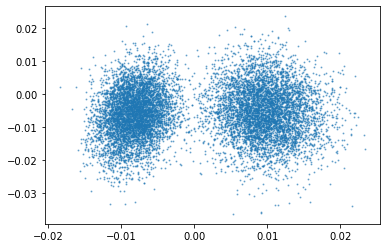

In [10]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import skbio.stats.composition
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# rho = pd.read_csv('rho_matrix.tsv', sep='\t')
three_depths = pd.read_csv('three_test_depths.vcf', sep="\t")
three_depths_clr = skbio.stats.composition.clr(three_depths)
three_depths_raw = three_depths.values
# depths = scale(depths, axis=0, with_mean=True, with_std=True, copy=True)
three_depths = MinMaxScaler().fit_transform(three_depths_raw)

var_d = pd.read_csv('three_var_depths.vcf', sep="\t") + 1
ref_d = pd.read_csv('three_ref_depths.vcf', sep="\t") + 1
# depths_clr = skbio.stats.composition.clr(var_d)
three_depths_pca = PCA(n_components=5, svd_solver='full')
three_depths_pca.fit(three_depths.T)
# projection = TSNE().fit_transform(depths)
plt.scatter(*three_depths_pca.components_[0:2], s=1, alpha=0.5)

In [14]:
three_depths.shape

(10856, 5)